# Investigating the Student Grades Dataset


This dataset contains the results of a survey conducted on students on Maths and Portuguese Language courses at two secondary schools in Portugal. Each entry contains the grades obtained by a student across three terms, and background data on the student's study habits and home situation.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Exploratory Data Analysis
Before we formulated our research question, we first cleaned up the dataset and performed basic exploratory data analysis to get an intuitive feel for the data.

In [ ]:
raw_data_mat = pd.read_csv("./student-mat.csv")
raw_data_por = pd.read_csv("./student-por.csv")
raw_data_mat = raw_data_mat.sample(frac=1).reset_index(drop=True) # shuffled data, reset_index re-indexes the elements
raw_data_por = raw_data_por.sample(frac=1).reset_index(drop=True) # shuffled data, reset_index re-indexes the elements

In [ ]:
print(raw_data_mat.shape)
print(raw_data_por.shape)

(395, 33)
(649, 33)


In [ ]:
raw_data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,15,U,GT3,T,2,2,services,services,home,father,1,4,0,no,yes,yes,yes,yes,yes,yes,no,5,5,4,1,2,5,6,16,14,15
1,GP,M,15,U,GT3,T,2,3,other,other,home,mother,1,3,0,yes,no,yes,no,no,yes,yes,no,5,3,2,1,2,5,4,11,10,11
2,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
3,GP,F,18,R,LE3,T,1,1,at_home,other,reputation,mother,2,4,0,no,yes,yes,yes,yes,yes,no,no,5,2,2,1,1,3,1,12,12,12
4,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7


In [ ]:
raw_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,MS,M,18,U,GT3,T,4,4,teacher,teacher,home,father,1,2,0,no,no,no,yes,no,yes,yes,no,3,2,4,1,4,2,4,17,18,19
1,MS,F,16,R,GT3,T,2,3,other,services,course,mother,3,2,0,no,yes,no,no,yes,yes,yes,no,4,5,4,1,2,1,2,15,15,15
2,GP,M,15,U,GT3,T,2,2,other,other,home,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,2,5,8,11,12,12
3,GP,F,20,R,GT3,T,2,1,other,other,course,other,2,2,0,no,yes,yes,yes,yes,no,yes,yes,1,2,3,1,2,2,8,10,12,12
4,GP,F,16,R,GT3,T,1,1,other,services,reputation,mother,2,1,0,no,yes,no,yes,yes,yes,no,yes,3,3,3,1,2,1,8,12,11,11


No invalid entries found

In [ ]:
raw_data_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
raw_data_por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Correlation Matrix
Fig. 1 and Fig. 2 show the correlation matrix between all pairs of numeric features in the two datasets. 

Some pairs of variables that are strongly correlated are:

1.   **Pairs of grades:**

> G2/G3 correlation: 0.9 

> G1/G2 correlation: 0.85

> G1/G3 correlation: 0.8

By far the most correlated variables are the grades achieved in each of one of the three periods of the school year. Additionally, correlation is closer between grades achieved more recently (i.e. Period 3 grade more correlated to the Period 2 grade than the Period 1 grade).


2.   **Daily alcohol consumption and Weekend alcohol consumpion**

> Dalc/Walc correlation: 0.65

People who drink more on the weekends are also more likely to drink more throughout the week.

3. **Education Level of Parents**

> Fedu/Medu correlation: 0.62

Parents of these students tend to be of similar education level.

4. **Weekend alcohol consumption and Going Out**

> Walc/goout correlation: 0.42

People who drink more on the weekends are also more likely to go out more with their friends.

5. **Failures and G1/G2/G3**

> failures/G1: -0.35; failures/G2: -0.36; failures/G3: -0.36

People who have failed more classes perform more poorly each term. However, the correlation value is relatively small, suggesting that this factor only plays a small part in determining the student's final grade.

(*The above figures were taken from the matrix for the Maths dataset, the same variables were correlated to a similar degree for the Portuguese dataset)

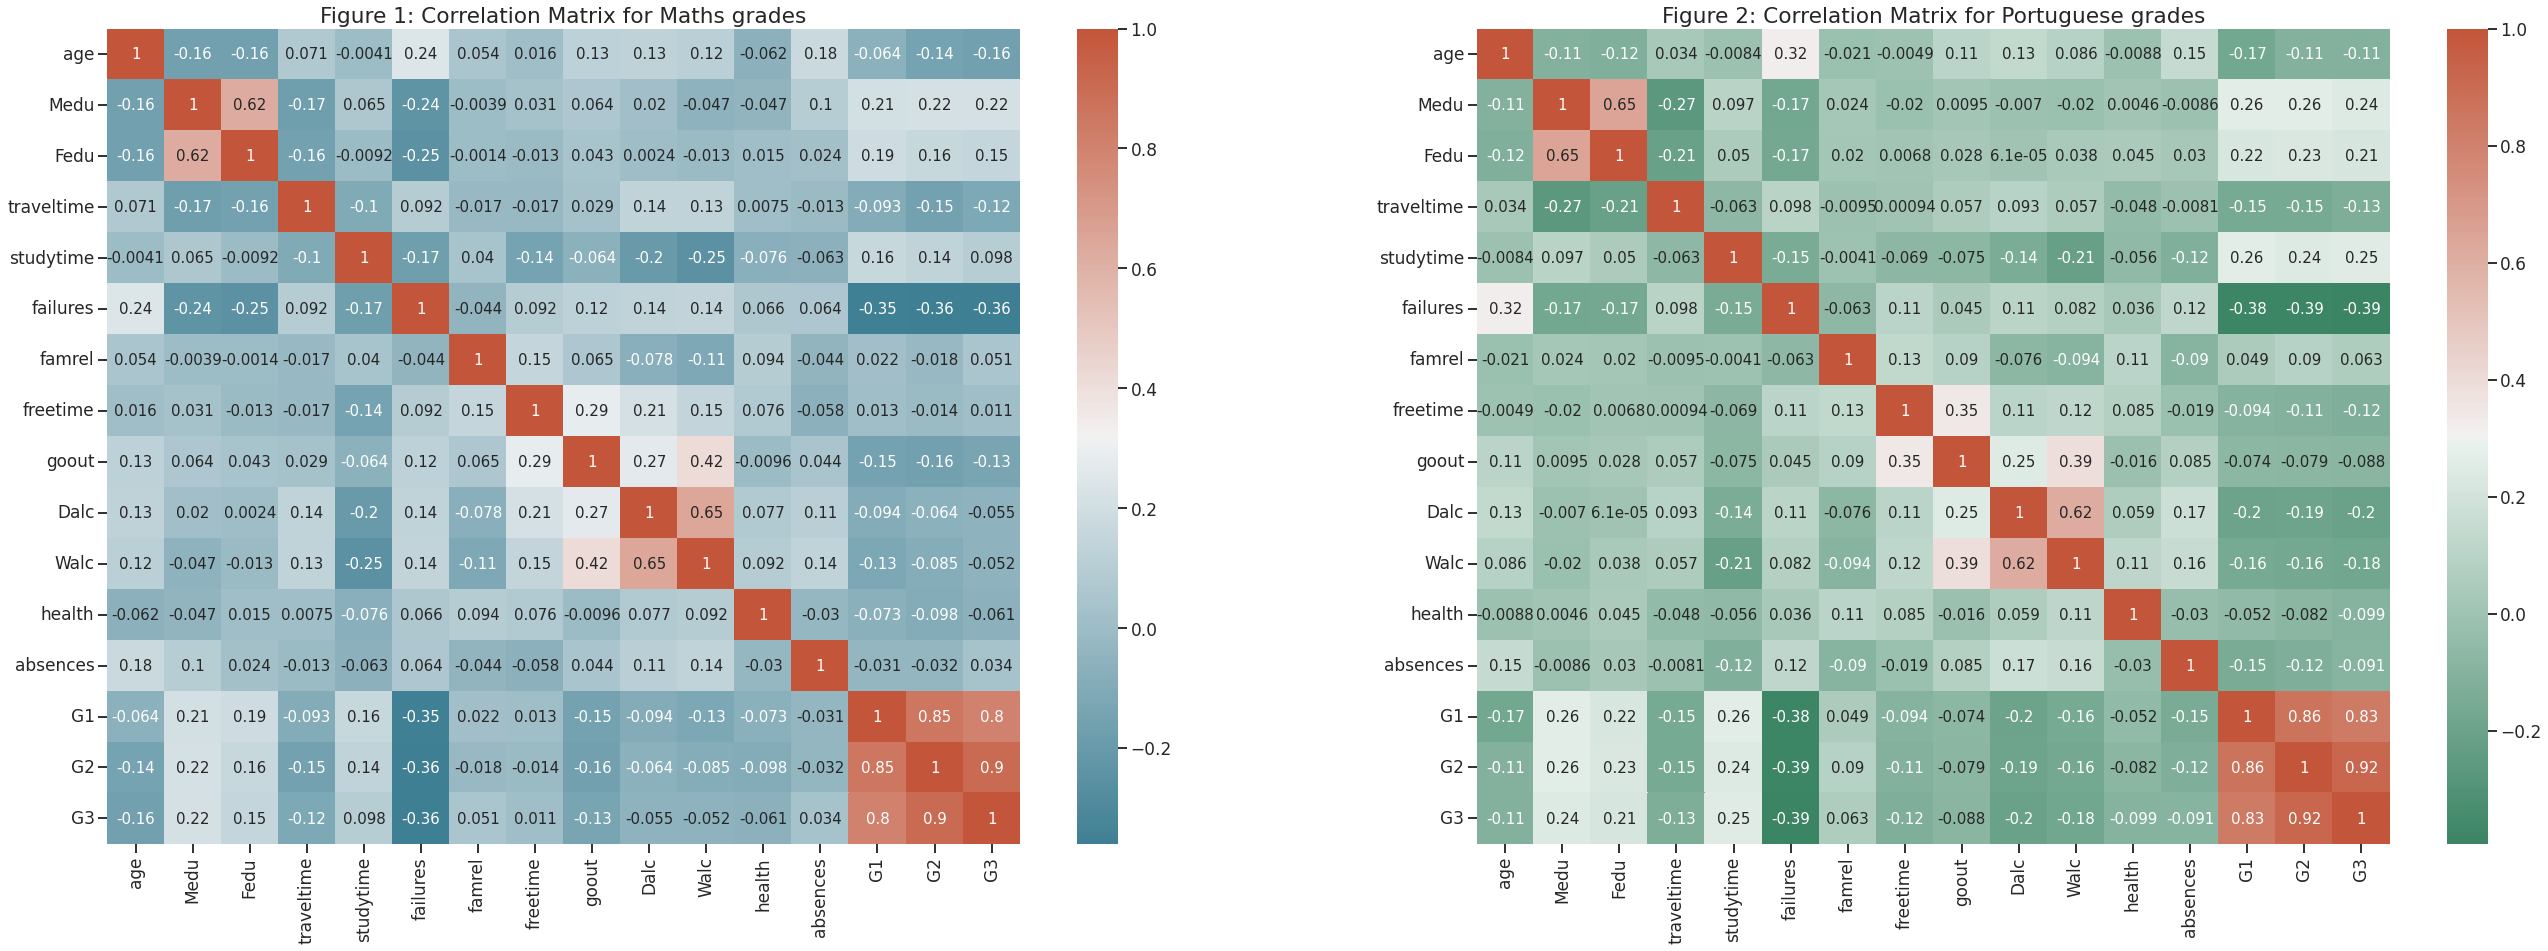

In [ ]:
# calculate correlation matrix maths
def plot(): #Function to set plotting parameters 
    sns.set()
    sns.set_style("ticks")
    sns.set_context("talk")
    sns.set_palette("Set2")

    params = {
        'axes.titlesize': 'x-large',
       'axes.labelsize': 20,
       'axes.linewidth': 5,
       'font.size': 15,
       'legend.fontsize': 10,
       'xtick.labelsize': 17,
       'ytick.labelsize': 17,
       'figure.figsize': [45, 15]
       }
    plt.rcParams.update(params)
    plt.minorticks_on()
    
plot()
corr = raw_data_mat.corr()# plot the heatmap

plt.subplot(1,2,1) #vertical

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Figure 1: Correlation Matrix for Maths grades")



# calculate correlation matrix portuguese
corr = raw_data_por.corr()# plot the heatmap
plt.subplot(1,2,2) #vertical
plt.title("Figure 2: Correlation Matrix for Portuguese grades")
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap=sns.diverging_palette(150, 20, as_cmap=True))



# Factors affecting grades
The correlation matrix shows that the by far the features most correlated to students' grades for one period are the student's grades in the other periods. In other words, a student's past performance is most indicative of their future performance. 


This is clearly seen in the scatter plots between a pair. The values are closely clustered around the y = x line, suggesting that a student's grade remains approximately the same across all 3 periods. 


It is also interesting to note the clustering appears to be tighter for the G2/G3 graphs compared to the G1/G3 and G2/G3 graphs. This suggests that the grade achieved in the final period is very similar to the grade achieved in the second period. Therefore, the period between term 1 and 2 is most critical for a student to improve their grade.


In [ ]:
def plot(): #Function to set plotting parameters 
    sns.set()
    sns.set_style("ticks")
    sns.set_context("talk")
    sns.set_palette("Set2")

    params = {
        'axes.titlesize': 'x-large',
       'axes.labelsize': 20,
       'axes.linewidth': 2,
       'font.size': 15,
       'legend.fontsize': 10,
       'xtick.labelsize': 17,
       'ytick.labelsize': 17,
       'figure.figsize': [20, 15]
       }
    plt.rcParams.update(plt.rcParamsDefault)




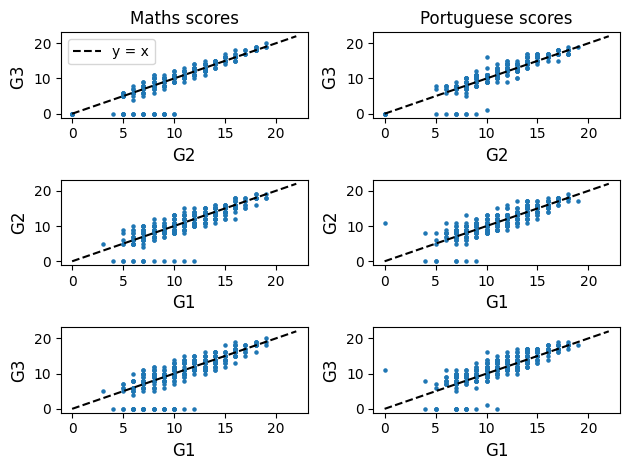

In [ ]:
mat_G1 = raw_data_mat['G1'].tolist()
mat_G2 = raw_data_mat['G2'].tolist()
mat_G3 = raw_data_mat['G3'].tolist()

por_G1 = raw_data_por['G1'].tolist()
por_G2 = raw_data_por['G2'].tolist()
por_G3 = raw_data_por['G3'].tolist()

xrange=np.linspace(0, 22, 100)

plot()
plt.subplot(3, 2, 1)

plt.title("Maths scores")
plt.scatter(mat_G2, mat_G3, s=5)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')
plt.legend()

plt.xlabel('G2', fontsize ='large')
plt.ylabel('G3 ', fontsize ='large')



plt.subplot(3, 2, 3)
plt.scatter(mat_G1, mat_G2, s=5)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')
plt.xlabel('G1', fontsize ='large')
plt.ylabel('G2', fontsize ='large')


plt.subplot(3, 2, 5)
plt.scatter(mat_G1, mat_G3, s=5)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')
plt.xlabel('G1', fontsize ='large')
plt.ylabel('G3', fontsize ='large')




plt.subplot(3, 2, 2)
plt.title("Portuguese scores")
plt.scatter(por_G2, por_G3, s=5)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')

plt.xlabel('G2', fontsize ='large')
plt.ylabel('G3 ', fontsize ='large')



plt.subplot(3, 2, 4)
plt.scatter(por_G1, por_G2, s=5)

plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')

plt.xlabel('G1', fontsize ='large')
plt.ylabel('G2', fontsize ='large')



plt.subplot(3, 2, 6)
plt.scatter(por_G1, por_G3, s=5)

plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')

plt.xlabel('G1', fontsize ='large')
plt.ylabel('G3', fontsize ='large')

plt.tight_layout()


# Dropouts
It can be seen from the scatter graphs that there are a sizeable number of people who are achieving a grade of 0 in period 2 and period 3. We have made the assumption that this means they are dropping out of school, as we noticed that all grades of 0 were achieved in either period 2 or period 3, and any 0 achieved in period 2 would also mean a 0 achieved in period 3. This implies that the student has stopped their studies rather than just performing particularly poorly.


On the Maths course, 38 people finished with a 0 for their final grade. On the Portuguese course, 15 people finished with a 0 for their final grade. It is also interesting to note that the percentage of dropouts is higher for Maths (9.6% dropout rate) compared to Portuguese (2.3% dropout rate). Perhaps this suggests that Maths is a more difficult subject than Portuguese, or that Portuguese is seen as a more important course to have completed compared to Maths.

We wanted to try to determine what the dropouts had in common and why they were dropping out. Our first hypothesis was that the dropouts were generally underperforming students whom at one point decided to give up on their studies. We calculated the mean grade of all students for the period that they had been in school. The mean grade for maths finishers and dropouts is 11.3 and 7.4 respectively, the finishers have a significantly higher mean grade. A similar trend is seen in the Portuguese dataset. This seems to support our hypothesis.   

We also suspected that the students dropping out were doing so for medical related reasons. However, plotting the frequency historgram of "health" showed a similar distribution of healthy and unhealthy students in both the dropouts and the finishers. Furthermore, the mean health rating of the dropouts is slightly higher than the finishers, in both the Maths and Portuguese datasets. 




In [ ]:
# dropouts
mat_dropouts = raw_data_mat[raw_data_mat['G3'] == 0]
print("Dropouts on Maths course:", mat_dropouts.shape[0])
print("Percentage of dropouts:", mat_dropouts.shape[0]/raw_data_mat.shape[0] * 100)
display(mat_dropouts.head())
por_dropouts = raw_data_por[raw_data_por['G3'] == 0]
print("Dropouts on Portuguese course:", por_dropouts.shape[0])
print("Percentage of dropouts:", por_dropouts.shape[0]/raw_data_por.shape[0] * 100)
display(por_dropouts.head())

Dropouts on Maths course: 38
Percentage of dropouts: 9.620253164556962


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
14,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother,2,4,0,no,no,no,yes,yes,yes,no,no,4,4,4,1,1,4,0,10,9,0
15,GP,M,19,U,GT3,T,3,2,services,at_home,home,mother,1,1,3,no,yes,no,no,yes,no,yes,yes,4,5,4,1,1,4,0,5,0,0
23,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4,4,4,2,4,5,0,7,0,0
31,GP,F,17,U,GT3,A,2,2,at_home,at_home,home,father,1,2,1,no,yes,no,no,yes,yes,yes,yes,3,3,1,1,2,4,0,9,8,0


Dropouts on Portuguese course: 15
Percentage of dropouts: 2.311248073959938


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
30,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,11,9,0
46,MS,M,18,R,GT3,T,2,1,other,other,other,mother,2,1,0,no,no,no,yes,no,yes,yes,yes,4,4,3,1,3,5,0,7,7,0
179,MS,M,18,R,GT3,T,3,2,services,other,course,mother,1,1,1,no,no,no,no,yes,no,yes,no,2,3,1,2,2,5,0,4,0,0
224,MS,F,17,U,GT3,T,4,2,teacher,services,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,5,5,1,3,5,0,8,8,0
225,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3,2,2,4,2,5,0,7,5,0


In [ ]:
mat_clean = raw_data_mat.drop(raw_data_mat[raw_data_mat.G3 == 0].index)
por_clean = raw_data_por.drop(raw_data_por[raw_data_por.G3 == 0].index)

In [ ]:
mat_dropouts["count"] = mat_dropouts[["G1", "G2", "G3"]].astype(bool).sum(axis=1)
mat_dropouts["G_sum"] = mat_dropouts[["G1", "G2", "G3"]].sum(axis=1)
mat_dropouts["mean"] = (mat_dropouts["G_sum"] / mat_dropouts["count"])
display(mat_dropouts.head())
print("Mean grade of maths dropouts", mat_dropouts["mean"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,count,G_sum,mean
2,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0,1,4,4.0
14,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother,2,4,0,no,no,no,yes,yes,yes,no,no,4,4,4,1,1,4,0,10,9,0,2,19,9.5
15,GP,M,19,U,GT3,T,3,2,services,at_home,home,mother,1,1,3,no,yes,no,no,yes,no,yes,yes,4,5,4,1,1,4,0,5,0,0,1,5,5.0
23,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4,4,4,2,4,5,0,7,0,0,1,7,7.0
31,GP,F,17,U,GT3,A,2,2,at_home,at_home,home,father,1,2,1,no,yes,no,no,yes,yes,yes,yes,3,3,1,1,2,4,0,9,8,0,2,17,8.5


Mean grade of maths dropouts 7.368421052631579


In [ ]:
mat_clean["count"] = mat_clean[["G1", "G2", "G3"]].astype(bool).sum(axis=1)
mat_clean["G_sum"] = mat_clean[["G1", "G2", "G3"]].sum(axis=1)
mat_clean["mean"] = (mat_clean["G_sum"] / mat_clean["count"])
print("Mean grade of Maths finishers", mat_clean["mean"].mean())

Mean grade of Maths finishers 11.383753501400557


In [ ]:
por_dropouts["count"] = por_dropouts[["G1", "G2", "G3"]].astype(bool).sum(axis=1)
por_dropouts["G_sum"] = por_dropouts[["G1", "G2", "G3"]].sum(axis=1)
por_dropouts["mean"] = (por_dropouts["G_sum"] / por_dropouts["count"])
display(por_dropouts.head())
print("Mean grade of Portuguese dropouts", por_dropouts["mean"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,count,G_sum,mean
30,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,11,9,0,2,20,10.0
46,MS,M,18,R,GT3,T,2,1,other,other,other,mother,2,1,0,no,no,no,yes,no,yes,yes,yes,4,4,3,1,3,5,0,7,7,0,2,14,7.0
179,MS,M,18,R,GT3,T,3,2,services,other,course,mother,1,1,1,no,no,no,no,yes,no,yes,no,2,3,1,2,2,5,0,4,0,0,1,4,4.0
224,MS,F,17,U,GT3,T,4,2,teacher,services,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,5,5,1,3,5,0,8,8,0,2,16,8.0
225,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3,2,2,4,2,5,0,7,5,0,2,12,6.0


Mean grade of Portuguese dropouts 6.933333333333334


In [ ]:
por_clean["count"] = por_clean[["G1", "G2", "G3"]].astype(bool).sum(axis=1)
por_clean["G_sum"] = por_clean[["G1", "G2", "G3"]].sum(axis=1)
por_clean["mean"] = (por_clean["G_sum"] / por_clean["count"])
print("Mean grade of Portuguese finishers", por_clean["mean"].mean())

Mean grade of Portuguese finishers 11.820189274447948


Average health of maths students who dropped out: 3.6052631578947367
Average health of enrolled maths students : 3.549019607843137
Average health of maths students who dropped out: 3.8
Average health of enrolled maths students : 3.529968454258675


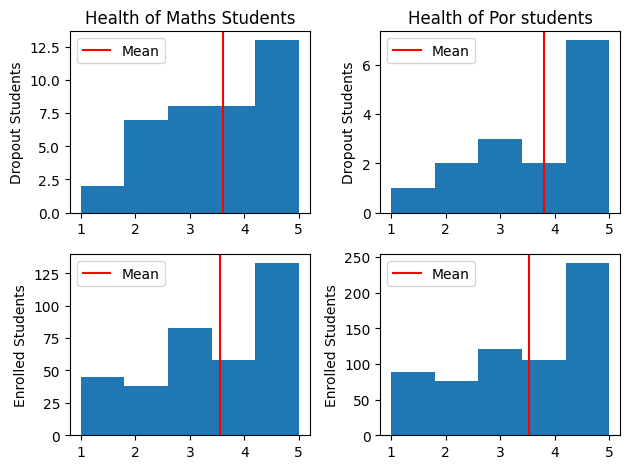

In [ ]:
mat_dropout_health = mat_dropouts["health"].tolist()
mat_dropout_mean = mat_dropouts["health"].mean()
print("Average health of maths students who dropped out: "+ str(mat_dropout_mean))

plt.subplot(2,2, 1)
plt.title("Health of Maths Students")
plt.ylabel("Dropout Students")
plt.hist(mat_dropout_health , bins=5)
plt.axvline(x=mat_dropout_mean, label='Mean', color='red')
plt.legend()

mat_clean_health = mat_clean["health"].tolist()
mat_clean_mean = mat_clean["health"].mean()
print("Average health of enrolled maths students : "+ str(mat_clean_mean))

plt.subplot(2,2, 3)
plt.ylabel("Enrolled Students")
plt.hist(mat_clean_health , bins=5)
plt.axvline(x=mat_clean_mean, label='Mean', color='red')
plt.legend()



por_dropout_health = por_dropouts["health"].tolist()
por_dropout_mean = por_dropouts["health"].mean()
print("Average health of maths students who dropped out: "+ str(por_dropout_mean))

plt.subplot(2,2, 2)
plt.title("Health of Por students")
plt.ylabel("Dropout Students")
plt.hist(por_dropout_health , bins=5)
plt.axvline(x=por_dropout_mean, label='Mean', color='red')
plt.legend()

por_clean_health = por_clean["health"].tolist()
por_clean_mean = por_clean["health"].mean()
print("Average health of enrolled maths students : "+ str(por_clean_mean))

plt.subplot(2,2, 4)
plt.ylabel("Enrolled Students")
plt.hist(por_clean_health , bins=5)
plt.axvline(x=por_clean_mean, label='Mean', color='red')
plt.legend()
plt.tight_layout()




# Research Question:

From our EDA, we saw that a the single variables that are most correlated to the student's final grade (G3) were 

**Can a linear regression model be trained to accurately predict a student's final grade?**

The linear regression model depends on all features being continuous variables. However, many of the features in our dataset are categorical values. 

Some features were numeric, ordinal categorical values. G1/G2/G3 take on a value between 0 and 20, it is not clear how exactly is allocated a grade, just that a higher grade indicates better performance. Workday/weekend alcohol consumption is also ranked from 1 . All numeric categorical values had more than 5 levels, so for simplicity we treated them all as continuous variables. 

Many features were nominal categorical values. Examples are: sex, address, Mjob and Fjob - occupation of mother and father respectively. Some categorical  values had some degree of ordinality, such as famsize, which can either be LE3 or GT3 (less than equal to 3 / greater than 3). For simplicity, one-hot encoding was used to convert all categorical values into numerical values. 

The cells below document our process of creating a linear regression model:

In [ ]:
raw_data = mat_clean 

In [ ]:
num_data = raw_data.select_dtypes(['number'])
num_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'count', 'G_sum', 'mean'],
      dtype='object')

In [ ]:
cat_data = raw_data.select_dtypes(['object'])
cat_data.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [ ]:
encoded_cat_data = pd.get_dummies(cat_data)
encoded_cat_data.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0
3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0
4,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1


In [ ]:
encoded_full_data = pd.concat([num_data, encoded_cat_data], axis=1)
encoded_full_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,count,G_sum,mean,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,15,2,2,1,4,0,5,5,4,1,2,5,6,16,14,15,3,45,15.000000,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
1,15,2,3,1,3,0,5,3,2,1,2,5,4,11,10,11,3,32,10.666667,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0
3,18,1,1,2,4,0,5,2,2,1,1,3,1,12,12,12,3,36,12.000000,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0
4,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,3,25,8.333333,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
5,17,3,4,1,3,1,4,4,3,3,4,5,28,10,9,9,3,28,9.333333,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1


In [ ]:
data = num_data
data = encoded_full_data #comment out if analysis only performed on numerical variables

header = data.columns.values

data = data.sample(frac=1).reset_index(drop=True) # shuffled data, reset_index re-indexes the elements

train_data = data.sample(frac=0.85, random_state=0)
test_data = data.drop(train_data.index) # separate some data that our model is not going to see.

train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('G3')
test_labels = test_features.pop('G3')

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(train_features)) # 


linear_model = tf.keras.Sequential([
                  normaliser, # put un-normalised features
                  tf.keras.layers.Dense(1), # connect all the features to one node
              ])
features = data.columns.values.tolist()
features.remove('G3')

print('Features: ', features)
print('Total of ', len(features), ' features')

one_sample = train_features.to_numpy()[[0],:]
print(f'prediction with random weights: {linear_model.predict(one_sample)}')



Features:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'count', 'G_sum', 'mean', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
Total of  61  features
prediction with random weights: [[-1.6673913]]


In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_squared_error')

In [ ]:
labelmean = np.mean(train_labels)
labelstd = np.std(train_labels)
newtrain = (train_labels-labelmean)/labelstd


history = linear_model.fit(
    train_features,
    newtrain,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

history.history.keys()

dict_keys(['loss', 'val_loss'])

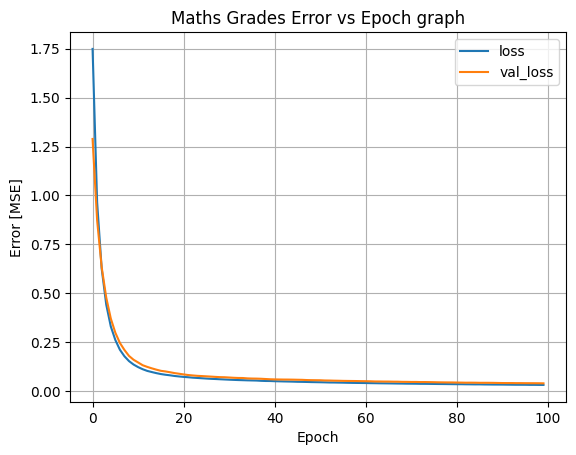

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plot()
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.title('Maths Grades Error vs Epoch graph')
plt.grid(True)

plt.show()



2/2 [==============================] - 0s 5ms/step - loss: 0.0615
The error in the grade prediction is: 0.7735


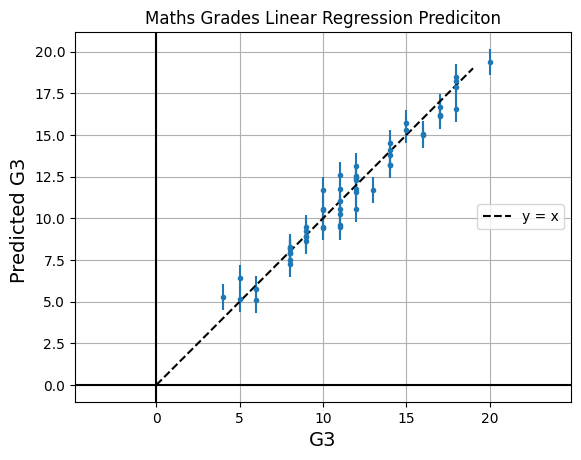

In [ ]:
#linear_model.summary()
linear_model.layers[1].kernel

test_labels_reg = (test_labels-labelmean)/labelstd

linear_model.evaluate(test_features,test_labels_reg)

predictions = linear_model.predict(test_features)[:,0]*labelstd + labelmean

plot()


error_sq = sum((predictions - test_labels)**2)/len(predictions)
err = np.sqrt(error_sq)


plt.errorbar(test_labels.to_numpy(), (predictions), yerr=err,marker = '.', linestyle = 'None')
plt.axvline(0,color='Black')
plt.axhline(0,color='Black')
plt.axis('equal')

xrange = np.arange(0,20)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')
plt.legend()
ax = plt.gca()
ax.set_xlabel('G3', fontsize =14)
ax.set_ylabel('Predicted G3 ', fontsize =14)
plt.title('Maths Grades Linear Regression Prediciton')
plt.grid()

print("The error in the grade prediction is: " + str(round(err, 4)))



#Portuguese Grade Linear Regression
It is the same code but just changing the input dataframe

In [ ]:
raw_data = por_clean

In [ ]:
num_data = raw_data.select_dtypes(['number'])
cat_data = raw_data.select_dtypes(['object'])
encoded_cat_data = pd.get_dummies(cat_data)
encoded_full_data = pd.concat([num_data, encoded_cat_data], axis=1)


Features:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'count', 'G_sum', 'mean', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
Total of  61  features
prediction with random weights: [[0.642675]]


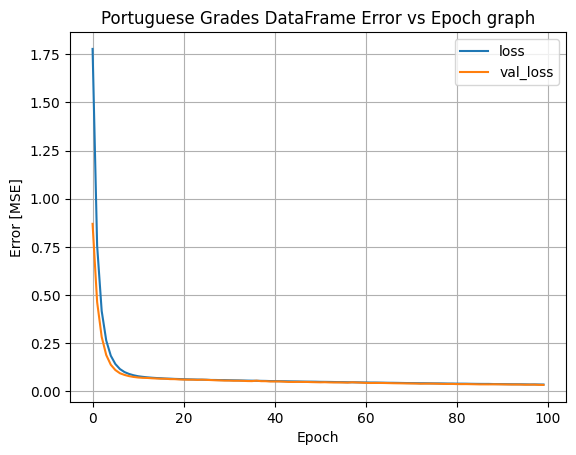

3/3 [==============================] - 0s 4ms/step - loss: 0.0507
The error in the grade prediction is: 0.6139


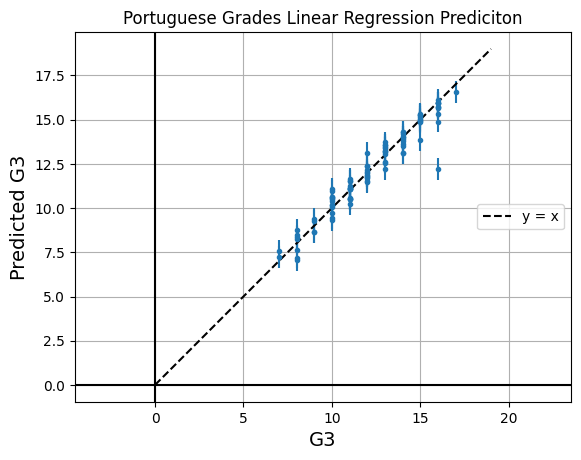

In [ ]:

data = num_data
data = encoded_full_data #comment out if analysis only performed on numerical variables

header = data.columns.values

data = data.sample(frac=1).reset_index(drop=True) # shuffled data, reset_index re-indexes the elements

train_data = data.sample(frac=0.85, random_state=0)
test_data = data.drop(train_data.index) # separate some data that our model is not going to see.

train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('G3')
test_labels = test_features.pop('G3')

normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(train_features)) # 


linear_model = tf.keras.Sequential([
                  normaliser, # put un-normalised features
                  tf.keras.layers.Dense(1), # connect all the features to one node
              ])
features = data.columns.values.tolist()
features.remove('G3')

print('Features: ', features)
print('Total of ', len(features), ' features')

one_sample = train_features.to_numpy()[[0],:]
print(f'prediction with random weights: {linear_model.predict(one_sample)}')



linear_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_squared_error')

labelmean = np.mean(train_labels)
labelstd = np.std(train_labels)
newtrain = (train_labels-labelmean)/labelstd


history = linear_model.fit(
    train_features,
    newtrain,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

history.history.keys()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plot()
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)
plt.title('Portuguese Grades DataFrame Error vs Epoch graph')
plt.show()

#linear_model.summary()
linear_model.layers[1].kernel

test_labels_reg = (test_labels-labelmean)/labelstd

linear_model.evaluate(test_features,test_labels_reg)

predictions = linear_model.predict(test_features)[:,0]*labelstd + labelmean


error_sq = sum((predictions - test_labels)**2)/len(predictions)
err = np.sqrt(error_sq)

plot()
plt.errorbar(test_labels.to_numpy(), (predictions),yerr=err, marker = '.', linestyle = 'None')
plt.axvline(0,color='Black')
plt.axhline(0,color='Black')
plt.axis('equal')

xrange = np.arange(0,20)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')
plt.legend()
ax = plt.gca()
ax.set_xlabel('G3', fontsize =14)
ax.set_ylabel('Predicted G3', fontsize =14)
plt.title('Portuguese Grades Linear Regression Prediciton')
plt.grid()


print("The error in the grade prediction is: " + str(round(err, 4)))


# Evaluating our Model

The models appears to work very well. The parameters that we used are

> Optimiser: Stochastic Gradient Descent, learning rate of 0.01

> Epochs: 100


Running our models on the test data, we see that the mean squared error(MSE) for the model trained on the Maths dataset ranges between 0.5 and 0.7 on different compilations, while the MSE for the Portuguese model ranges between 0.4 and 0.6. Taking the average MSE, this gives the Maths model an uncertainty of +/- 0.77 and the Portuguese model and uncertainty of +/- 0.71. This means that the model can accurately predict a result to a range of 3 grades. 

The error is smaller for the model trained on the Portuguese dataset is slightly smaller because the dataset was larger and therefore there was more data for the model to train on. 

The learning curves for the two models show that the model is fitting the data well, suggesting that the current parameters for our model is effective. The optimisation loss curve and validation loss curve are very close together, meaning generalisation error is small. The loss of both curves smooth out quickly, suggesting that the model is not over or under fitting the data. 

All in all we believe that we have been successful in creating a linear model to predict student grades. An accuracy of 3 grades seems reasonable for any model, because it leaves room for students to overperform or underperform.
